In [ ]:
#cns course project 

In [2]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA


In [5]:
# Replace with your dataset path
file_path = 'labelled_training_data 2.csv'
df = pd.read_csv(file_path)
df.head()


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0


In [7]:
print(df.columns)



Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'processName', 'hostName', 'eventId', 'eventName',
       'stackAddresses', 'argsNum', 'returnValue', 'args', 'sus', 'evil'],
      dtype='object')


In [8]:
print(df['processName'].unique())
print(df['eventName'].unique())



['close' 'sh' 'run-parts' 'atd' 'systemd-logind' 'systemd'
 'systemd-journal' 'dbus-daemon' '(time-dir)' 'systemd-user-ru' 'docker'
 'systemd-resolve' 'dockerd' 'containerd-shim' 'amazon-ssm-agen' 'ps'
 'cron' 'snapd' 'systemd-network' 'journal-offline' 'kworker/dying'
 'ssm-agent-worke' 'packagekitd' 'gdbus' 'gmain' '(tmpfiles)'
 'systemd-tmpfile' 'kworker/u30:1' 'poweroff' '(sd-sync)' 'kworker/u30:0'
 'kworker/u30:2' 'systemd-timesyn' 'systemd-udevd' '(sd-pam)' 'sshd']
['prctl' 'close' 'sched_process_exit' 'access' 'security_file_open'
 'openat' 'fstat' 'stat' 'clone' 'execve' 'security_bprm_check'
 'getdents64' 'cap_capable' 'kill' 'lstat' 'fchmod'
 'security_inode_unlink' 'unlink' 'dup3' 'socket' 'connect' 'dup2'
 'accept4' 'unlinkat' 'umount' 'getsockname' 'symlink' 'bind' 'setgid'
 'setuid' 'accept' 'dup']


In [9]:
df[df['evil'] == 1].head()
df[df['sus'] == 1].head()


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0


In [11]:
# For FTP-specific process filtering
ftp_process = ['vsftpd', 'ftp', 'ftpd']
df_ftp = df[df['processName'].isin(ftp_process)]


In [12]:
print(df['processName'].unique())


['close' 'sh' 'run-parts' 'atd' 'systemd-logind' 'systemd'
 'systemd-journal' 'dbus-daemon' '(time-dir)' 'systemd-user-ru' 'docker'
 'systemd-resolve' 'dockerd' 'containerd-shim' 'amazon-ssm-agen' 'ps'
 'cron' 'snapd' 'systemd-network' 'journal-offline' 'kworker/dying'
 'ssm-agent-worke' 'packagekitd' 'gdbus' 'gmain' '(tmpfiles)'
 'systemd-tmpfile' 'kworker/u30:1' 'poweroff' '(sd-sync)' 'kworker/u30:0'
 'kworker/u30:2' 'systemd-timesyn' 'systemd-udevd' '(sd-pam)' 'sshd']


In [13]:
df[df['processName'].str.contains('ftp', case=False, na=False)]


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil


In [14]:
df_ssh = df[df['processName'].str.contains('ssh', case=False, na=False)]


In [15]:
print(df_ssh.shape)
df_ssh.head()


(91762, 16)


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
670635,191.884606,3338,3338,1,0,4026531840,sshd,ip-10-100-1-120,62,kill,"[139829520844123, 1186065754345177112]",2,0,"[{'name': 'pid', 'type': 'pid_t', 'value': 0},...",0,0
670636,191.885170,3338,3338,1,0,4026531840,sshd,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],0,0
670637,1242.256657,7097,7097,1,0,4026531840,sshd,ip-10-100-1-120,43,accept,[140697427337783],3,5,"[{'name': 'sockfd', 'type': 'int', 'value': 3}...",0,0
670638,1242.257446,7097,7097,1,0,4026531840,sshd,ip-10-100-1-120,56,clone,[140697427087551],5,7321,"[{'name': 'flags', 'type': 'int', 'value': 'CL...",0,0
670639,1242.257595,7097,7097,1,0,4026531840,sshd,ip-10-100-1-120,3,close,[140697427265927],1,0,"[{'name': 'fd', 'type': 'int', 'value': 7}]",0,0


In [17]:
df_ssh = df[df['processName'].str.contains('ssh', case=False, na=False)].copy()
df_ssh['is_attack'] = (df_ssh['evil'] | df_ssh['sus'])


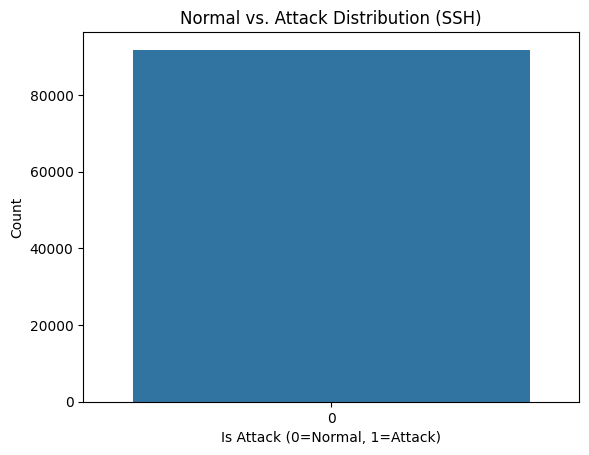

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_attack', data=df_ssh)
plt.title('Normal vs. Attack Distribution (SSH)')
plt.xlabel('Is Attack (0=Normal, 1=Attack)')
plt.ylabel('Count')
plt.show()


In [19]:
print("EventName unique values:", df_ssh['eventName'].unique())
print("Sample rows with attacks:\n", df_ssh[df_ssh['is_attack']==1].head())


EventName unique values: ['kill' 'sched_process_exit' 'accept' 'clone' 'close' 'fstat'
 'security_file_open' 'openat' 'dup2' 'security_bprm_check' 'execve'
 'access' 'cap_capable' 'getdents64' 'dup' 'socket' 'bind' 'getsockname'
 'connect' 'stat' 'lstat' 'setgid' 'setuid' 'prctl']
Sample rows with attacks:
 Empty DataFrame
Columns: [timestamp, processId, threadId, parentProcessId, userId, mountNamespace, processName, hostName, eventId, eventName, stackAddresses, argsNum, returnValue, args, sus, evil, is_attack]
Index: []


In [20]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['processName', 'eventName', 'hostName']  # add more if needed and present in data
for col in cat_cols:
    df_ssh[col] = LabelEncoder().fit_transform(df_ssh[col])


In [21]:
print(df['evil'].value_counts())
print(df['sus'].value_counts())
print(df[df['evil'] == 1].head())
print(df[df['sus'] == 1].head())


evil
0    763144
Name: count, dtype: int64
sus
0    761875
1      1269
Name: count, dtype: int64
Empty DataFrame
Columns: [timestamp, processId, threadId, parentProcessId, userId, mountNamespace, processName, hostName, eventId, eventName, stackAddresses, argsNum, returnValue, args, sus, evil]
Index: []
     timestamp  processId  threadId  parentProcessId  userId  mountNamespace  \
0  1809.495787        381      7337                1     100      4026532231   
1  1809.495832        381      7337                1     100      4026532231   
2  1809.495921        381      7337                1     100      4026532231   
3  1894.139651       7347      7347             7341       0      4026531840   
4  1894.142127       7347      7347             7341       0      4026531840   

  processName         hostName  eventId           eventName  \
0       close  ip-10-100-1-120      157               prctl   
1       close  ip-10-100-1-120        3               close   
2       close  ip-10-100-1

In [22]:
df_proc = df.copy()
df_proc['is_attack'] = df_proc['sus']  # 1 = Suspicious, 0 = Normal


In [23]:
print(df_proc['is_attack'].value_counts())


is_attack
0    761875
1      1269
Name: count, dtype: int64


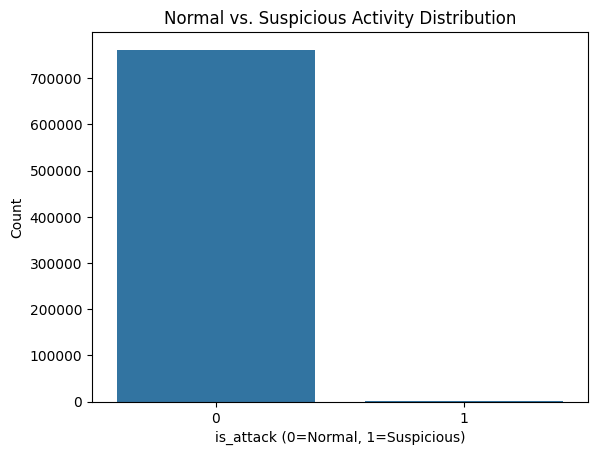

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_attack', data=df_proc)
plt.title('Normal vs. Suspicious Activity Distribution')
plt.xlabel('is_attack (0=Normal, 1=Suspicious)')
plt.ylabel('Count')
plt.show()


In [25]:
print(df_proc[df_proc['is_attack'] == 1].head())   # Sample suspicious events
print(df_proc[df_proc['is_attack'] == 0].head())   # Sample normal events


     timestamp  processId  threadId  parentProcessId  userId  mountNamespace  \
0  1809.495787        381      7337                1     100      4026532231   
1  1809.495832        381      7337                1     100      4026532231   
2  1809.495921        381      7337                1     100      4026532231   
3  1894.139651       7347      7347             7341       0      4026531840   
4  1894.142127       7347      7347             7341       0      4026531840   

  processName         hostName  eventId           eventName  \
0       close  ip-10-100-1-120      157               prctl   
1       close  ip-10-100-1-120        3               close   
2       close  ip-10-100-1-120     1010  sched_process_exit   
3          sh  ip-10-100-1-120       21              access   
4          sh  ip-10-100-1-120     1005  security_file_open   

                         stackAddresses  argsNum  returnValue  \
0  [140662171848350, 11649800180280676]        5            0   
1         

In [26]:
print("Suspicious process names:")
print(df_proc[df_proc['is_attack'] == 1]['processName'].value_counts())

print("Suspicious event types:")
print(df_proc[df_proc['is_attack'] == 1]['eventName'].value_counts())


Suspicious process names:
processName
systemd      992
sh           119
run-parts    112
close         36
atd            6
(sd-pam)       4
Name: count, dtype: int64
Suspicious event types:
eventName
openat                   299
lstat                    260
close                    223
stat                     114
fstat                    111
security_file_open        95
getdents64                78
sched_process_exit        34
access                    14
prctl                     12
clone                      7
execve                     7
security_bprm_check        7
security_inode_unlink      4
unlink                     4
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['processName', 'eventName', 'hostName']
for col in cat_cols:
    df_proc[col] = LabelEncoder().fit_transform(df_proc[col])


In [28]:
features = ['processName', 'eventName', 'argsNum', 'returnValue', 'hostName']  # add/remove depending on relevance
X = df_proc[features]
y = df_proc['is_attack']


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152375
           1       0.81      0.60      0.69       254

    accuracy                           1.00    152629
   macro avg       0.91      0.80      0.84    152629
weighted avg       1.00      1.00      1.00    152629



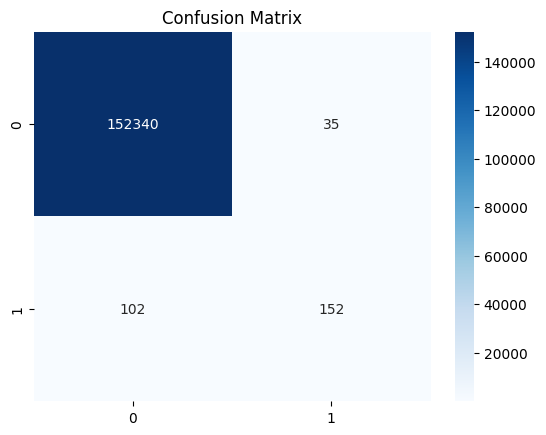

AUC ROC Score: 0.80


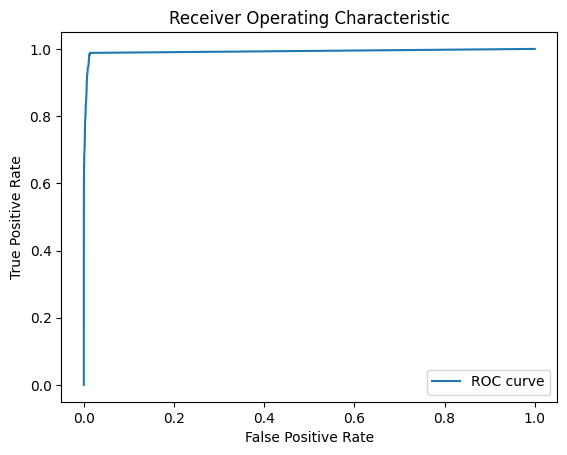

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

roc_score = roc_auc_score(y_test, y_pred)
print(f'AUC ROC Score: {roc_score:.2f}')

fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [33]:
from sklearn.ensemble import IsolationForest
import numpy as np

iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(X_train)
y_pred_unsup = iso.predict(X_test)
y_pred_unsup = np.where(y_pred_unsup == -1, 1, 0)
print(classification_report(y_test, y_pred_unsup))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95    152375
           1       0.01      0.46      0.02       254

    accuracy                           0.91    152629
   macro avg       0.50      0.68      0.48    152629
weighted avg       1.00      0.91      0.95    152629



In [34]:
from sklearn.metrics import accuracy_score
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9991023986267354
